In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
sns.set()

# Dados lineares


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/neural-nets-master/examples/linear/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/neural-nets-master/examples/linear/data/test.csv')
train.head()

,x,y,color
0,1.146728,2.233629,0.0
1,3.676886,4.520687,0.0
2,0.730671,1.426260,0.0
3,1.950790,3.145987,0.0
4,4.323010,5.320534,0.0


In [ ]:
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)       # nem precisa
train.head()

,x,y,color
0,0.438196,0.961385,0.0
1,0.475963,-0.228162,1.0
2,2.725577,1.532899,1.0
3,3.519180,4.518933,0.0
4,2.610228,1.893164,1.0


In [ ]:
X_train = train.drop('color',axis=1).values
y_train = train['color'].values
X_test = test.drop('color',axis=1).values
y_test = test['color'].values

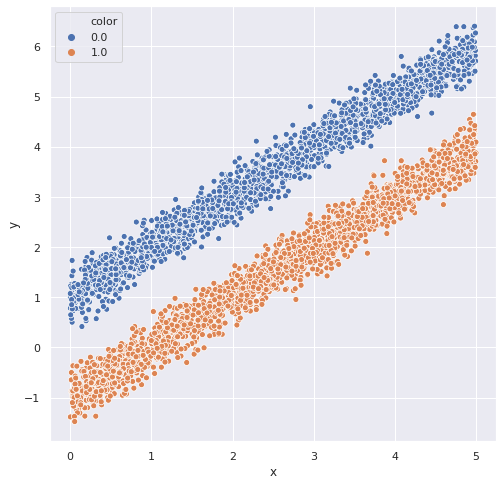

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train,x='x',y='y',hue='color')

In [ ]:
# Layer de 4 neurons com input de 2 neurons, com relu de ativação
# Layer de 2 neuronios que recebem os 4 anteriores
model = keras.Sequential([keras.layers.Dense(4,input_shape=(2,),activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(X_train,y_train,batch_size=4,epochs=5)


Epoch 1/5
1000/1000 [==============================] - 1s 780us/step - loss: 0.4753 - accuracy: 0.9760
Epoch 2/5
1000/1000 [==============================] - 1s 771us/step - loss: 0.3545 - accuracy: 1.0000
Epoch 3/5
1000/1000 [==============================] - 1s 798us/step - loss: 0.3291 - accuracy: 1.0000
Epoch 4/5
1000/1000 [==============================] - 1s 764us/step - loss: 0.3211 - accuracy: 1.0000
Epoch 5/5
1000/1000 [==============================] - 1s 751us/step - loss: 0.3177 - accuracy: 1.0000


In [ ]:
model.evaluate(X_test,y_test)

125/125 [==============================] - 0s 752us/step - loss: 0.3166 - accuracy: 1.0000


[0.316622257232666, 1.0]

In [ ]:
model.predict(X_test)

array([[5.1673740e-02, 9.3968225e-01],
       [1.4543533e-04, 9.9979568e-01],
       [9.9936384e-01, 6.0364604e-04],
       ...,
       [9.8643297e-01, 1.3554275e-02],
       [5.6769550e-03, 9.9323231e-01],
       [3.7974119e-04, 9.9952340e-01]], dtype=float32)

# Dados Quadráticos

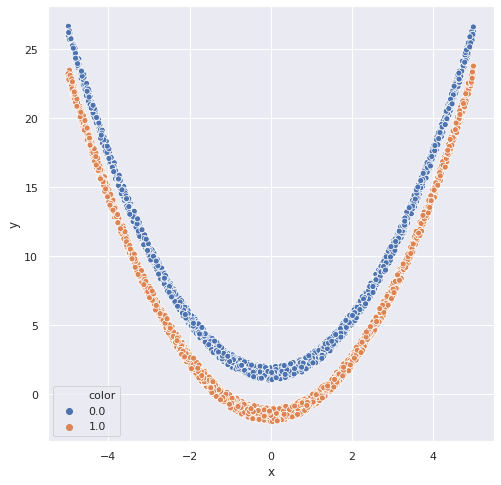

In [310]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/neural-nets-master/examples/quadratic/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/neural-nets-master/examples/quadratic/data/test.csv')

train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)       # nem precisa

X_train = train.drop('color',axis=1).values
y_train = train['color'].values
X_test = test.drop('color',axis=1).values
y_test = test['color'].values

plt.figure(figsize=(8,8))
sns.scatterplot(data=train,x='x',y='y',hue='color')


In [311]:
# Layer de 32 neurons com input de 2 neurons, com relu de ativação
# Layer de 32 neurons que recebem os anteriores, com relu de ativação
# Layer de 2 neuronios que recebem os anteriores
model = keras.Sequential([keras.layers.Dense(32,input_shape=(2,),activation='relu'),
                          keras.layers.Dense(32,activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(X_train,y_train,batch_size=4,epochs=10)

Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5847 - accuracy: 0.7487
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4655 - accuracy: 0.8633
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3978 - accuracy: 0.9395
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3701 - accuracy: 0.9628
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3516 - accuracy: 0.9800
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3432 - accuracy: 0.9855
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3367 - accuracy: 0.9868
Epoch 8/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3407 - accuracy: 0.9797
Epoch 9/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3257 - accuracy: 0.9942
Epoch 10/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.335

In [312]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 1.0000


[0.3173025846481323, 1.0]

# Multiclass

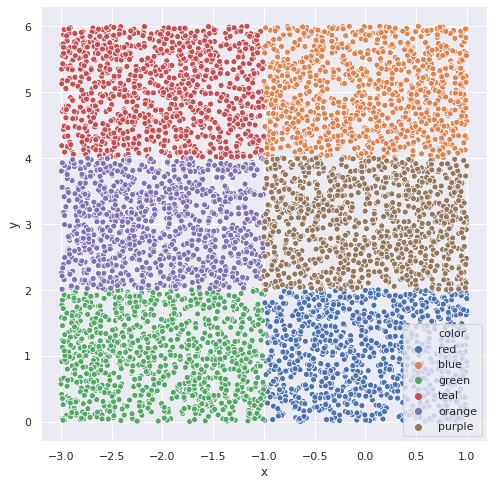

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/neural-nets-master/examples/clusters/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/neural-nets-master/examples/clusters/data/test.csv')

plt.figure(figsize=(8,8))
sns.scatterplot(data=train,x='x',y='y',hue='color')


In [ ]:
train.head()

,x,y,color
0,0.129270,1.979720,red
1,-0.380831,1.693519,red
2,0.718693,1.791793,red
3,0.722922,0.620655,red
4,-0.432689,0.541550,red


In [ ]:
train['color'] = pd.Categorical(train['color'])
train['color'] = train['color'].cat.codes
train['color']

#ou
# categories = train['color'].unique()
# dict_categories = dict(zip(categories,range(categories.shape[0])))
# train['color'] = train['color'].replace(dict_categories)

0       4
1       4
2       4
3       4
4       4
       ..
5995    3
5996    3
5997    3
5998    3
5999    3
Name: color, Length: 6000, dtype: int8

In [ ]:
train['color'].value_counts()

3    1000
2    1000
5    1000
1    1000
4    1000
0    1000
Name: color, dtype: int64

In [ ]:
train = train.sample(frac=1).reset_index(drop=True)
test = train.sample(frac=1).reset_index(drop=True)       # nem precisa

X_train = train.drop('color',axis=1).values
y_train = train['color'].values
X_test = test.drop('color',axis=1).values
y_test = test['color'].values

In [ ]:
# Layer de n_neurons neurons com input de 2 neurons, com relu de ativação
# Layer de n_neurons neurons que recebem os anteriores, com relu de ativação
# Layer de n_labels neuronios que recebem os anteriores
n_neurons = 32
n_labels = train['color'].nunique()
model = keras.Sequential([keras.layers.Dense(n_neurons,input_shape=(2,),activation='relu'),
                          keras.layers.Dense(n_neurons,activation='relu'),
                          keras.layers.Dense(n_labels, activation='sigmoid')])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(X_train,y_train,batch_size=4,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.3126 - accuracy: 0.6360
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1767 - accuracy: 0.7317
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1469 - accuracy: 0.8640
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1166 - accuracy: 0.9265
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.0997 - accuracy: 0.9485
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.0888 - accuracy: 0.9665
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.0812 - accuracy: 0.9707
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.0768 - accuracy: 0.9762
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.0745 - accuracy: 0.9750
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.073

In [ ]:
model.evaluate(X_test,y_test)

188/188 [==============================] - 0s 864us/step - loss: 1.0621 - accuracy: 0.9815


[1.0621051788330078, 0.9815000295639038]

In [ ]:
X_test_pred = model.predict(X_test)

In [ ]:
X_test_pred.argmax(axis=1)

array([0, 1, 3, ..., 0, 2, 3])

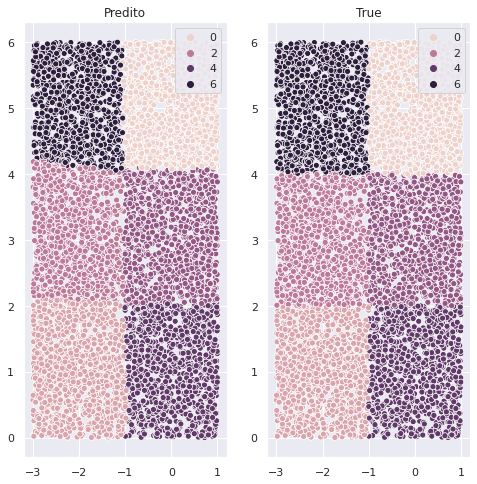

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(8,8))
fig_pred = sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=X_test_pred.argmax(axis=1),ax=ax[0]).set(title='Predito')
fig_true = sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_test,ax=ax[1]).set(title='True')

# Classificação múltipla $y = (y_1,y_2)$ - NÃO FUNFA


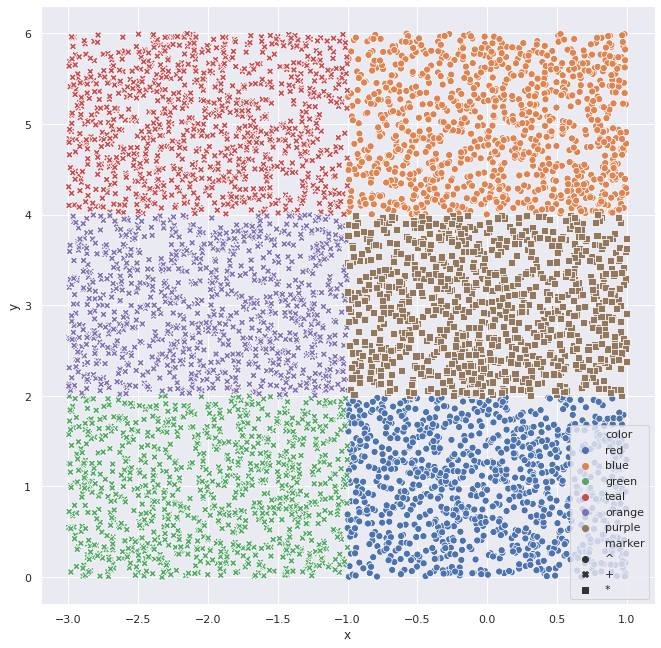

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/neural-nets-master/examples/clusters_two_categories/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/neural-nets-master/examples/clusters_two_categories/data/test.csv')

plt.figure(figsize=(11,11))
sns.scatterplot(data=train,x='x',y='y',hue='color',style=train['marker'],s=50)

In [ ]:
train.head()

,x,y,color,marker
0,-0.765775,1.006452,red,^
1,0.229016,0.094320,red,^
2,0.189987,1.589141,red,^
3,0.580085,0.520488,red,^
4,0.292287,0.317852,red,^


In [ ]:
train[['color','marker']].drop_duplicates()
#Pra cada color eu tenho um marker diferente, ou seja, bastaria prever só o color(y_1) msm

,color,marker
0,red,^
1000,blue,^
2000,green,+
3000,teal,+
4000,orange,+
5000,purple,*


In [ ]:
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)       # nem precisa

In [ ]:
#6 primeiros numeros do vetor vão representar as cores e os 3 últimos os markers
y_train_labels = pd.get_dummies(train[['color','marker']]).values
y_test_labels = pd.get_dummies(test[['color','marker']]).values

y_train_labels

array([[0, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=uint8)

In [ ]:
X_train = train.drop(['color','marker'],axis=1).values
X_test = test.drop(['color','marker'],axis=1).values

In [ ]:
# Layer de n_neurons neurons com input de 2 neurons, com relu de ativação
# Layer de n_neurons neurons que recebem os anteriores, com relu de ativação
# Layer de n_labels neuronios que recebem os anteriores
n_neurons = 32
n_labels = y_train_labels.shape[1]
model = keras.Sequential([keras.layers.Dense(n_neurons,input_shape=(2,),activation='relu'),
                          keras.layers.Dense(n_neurons,activation='relu'),
                          keras.layers.Dense(n_labels, activation='sigmoid')])

model.compile(optimizer = 'adam',
              loss = keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['accuracy'])


model.fit(X_train,y_train_labels,batch_size=4,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6783 - accuracy: 0.0657
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6585 - accuracy: 0.1518
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6561 - accuracy: 0.1507
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6550 - accuracy: 0.1398
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6544 - accuracy: 0.1315
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6539 - accuracy: 0.1308
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6535 - accuracy: 0.1387
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6533 - accuracy: 0.1495
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6531 - accuracy: 0.1567
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.652

# Dados mais complicados

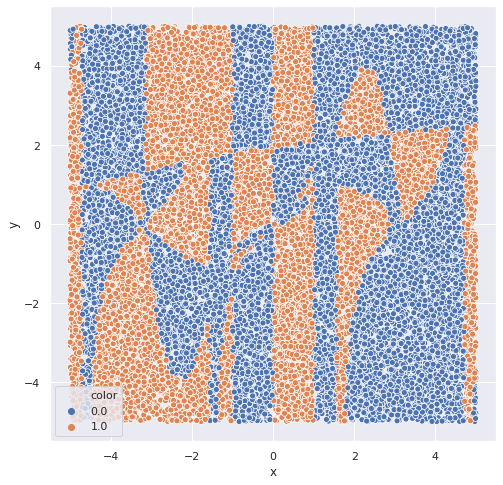

In [315]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/neural-nets-master/examples/complex/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/neural-nets-master/examples/complex/data/test.csv')

train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)       # nem precisa

X_train = train.drop('color',axis=1).values
y_train = train['color'].values
X_test = test.drop('color',axis=1).values
y_test = test['color'].values

plt.figure(figsize=(8,8))
sns.scatterplot(data=train,x='x',y='y',hue='color')


In [317]:
n_labels = train['color'].nunique()
model = keras.Sequential([keras.layers.Dense(256,input_shape=(2,),activation='relu'),
                          keras.layers.Dropout(0.4),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dropout(0.4),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(n_labels, activation='sigmoid')])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(X_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
625/625 [==============================] - 1s 2ms/step - loss: 0.6347 - accuracy: 0.6187
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5951 - accuracy: 0.6968
Epoch 3/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5617 - accuracy: 0.7372
Epoch 4/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.7457
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5408 - accuracy: 0.7530
Epoch 6/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.7588
Epoch 7/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5312 - accuracy: 0.7621
Epoch 8/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.7645
Epoch 9/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7702
Epoch 10/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5238 - accuracy: 0.7746

In [318]:
model.evaluate(X_test,y_test)

157/157 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.8316


[0.4735826551914215, 0.83160001039505]